In [1]:
# 커널 = 필터 = 가중치
# 합성곱 : 입력데이터에 도작을 찍어서 유용한 특성만 드러내게 하는 것으로 비유
# Dense를 기준으로 하면(밀집층) -> 완전연결 신경망
# 뉴런마다 입력개수의 가중치가 있음
# w1 ~ w10 와 절편 b를 랜덤하게 초기화한다음에 에포크를 반복하면서 경사하강법 알고리즘을 사용하여
#  손실이 낮아지도록 최적의 가중치와 절편을 찾는게 바로 모델 훈련

# 밀집층에 뉴런이 3개 있으면 출력은 3개가 됨 
# 784픽셀 -> 100뉴런 ->출력100

# 합성곱은.. 계산방식이 밀집층과 다르다.. 입력데이터의 전체에 가중치가 적용되는게 아니라. 일부에 가중치를 곱한다.

# w1 ~ w3 입력이 처음 3개의 특징(커널,필터,가중치)과 곱해져서 1개의 출력
# 한칸씩 이동하면서 두번째. 세번째 입력과 곱해져서 출력을 생성
# 첫번째 사용된 가중치 w1 ~ w3와 절편 b가 두번째 세번째 합성곱에도 동일하게 적용
# 10개의 데이터에 가중치(3개짜리를 한칸씩)  -> 8개

# 밀집층은 10개의 가중치를 가지고 한개의 출력 합성곱은 3개의 가중치를 가지고 8개의 출력

# 합성곱을 통해서 얻은 출력 : 특성 맵

In [2]:
from tensorflow import keras

In [3]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu')

In [4]:
# 기존에 Dense 층에다가 Conv2D 층을 넣으면 된다... kernel_size만 고려하면 됨

In [5]:
# 패딩 출력의 크기를 동일하게 맞춰준다
# (4,4) -> 커널(3,3) --> 출력의 크기도 (4,4)
# 주변에 가상의 값을 채운다... 값은 0   커널이 도장을 찍을 횟수를 늘려주는 
# 입력특성과 출력특성의 크기를 동일하게 -> 주위에 0 -> 세임 패딩(가장 많이사용)
# 패딩없이 사용-> 밸리드 패딩( 특성맵의 크기가 줄어들수  밖에 없다)

In [6]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu',padding='same')

In [7]:
# 두칸씩 건너뛸수도 있음
# 특성맵이 더 작아진다.
# 이동크기 스트라이드
# 스트라이드 : 1   기본이 1

In [8]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu',padding='same',strides=1)

In [9]:
# 폴링
# 합성곱을 통해 나온 특성맵의 가로 세로 길이를 줄이는 역활 -> 갯수를 줄이지는 않는다
# 4x4 입력 -> (3 x 3) 3번  커널을 적용  -> (2,2,3) (특성맵)  ->폴링(2,2) ->(1,1,3)특성맵
# 폴링: 가중치가 없고   쵀대값을선택하는걸 최대폴링, 평균값을 선택하는 것을 평균폴링

In [10]:
keras.layers.MaxPool2D(2,padding='valid',strides=2)

In [11]:
(x_train,y_train),(x_target,y_target) = keras.datasets.fashion_mnist.load_data()

In [12]:
# Conver2D  흑백채널에 채널차원을 추가

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_reshape_scaled =  x_train.reshape(-1,28,28,1) / 255.0
x_reshape_scaled.shape

(60000, 28, 28, 1)

In [15]:
from sklearn.model_selection import train_test_split
x_train_scaled,x_target_scaled,y_train_scaled,y_target_scaled  = train_test_split(x_reshape_scaled,y_train, test_size=0.2, random_state=42)

In [16]:
model = keras.Sequential()

In [17]:
model.add(keras.layers.Conv2D(32, kernel_size=3,activation='relu', padding='same', input_shape=(28,28,1) ) )

In [18]:
model.add(keras.layers.MaxPool2D(2))

In [19]:
model.add(keras.layers.Conv2D(64,  kernel_size=3,activation='relu', padding='same') )
model.add(keras.layers.MaxPool2D(2))

In [20]:
# 최종 특성맵의 크기는 ?  (7, 7, 64)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10,activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [22]:
!pip install pydot
!pip install graphviz

In [23]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [25]:
# adam, modelcheckpoint, earlystopping

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoinCB = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
earlyStoppingCB = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

In [27]:
history = model.fit(x_train_scaled, y_train_scaled, epochs=25, 
                    validation_data=(x_target_scaled,y_target_scaled) ,callbacks=[checkpoinCB,earlyStoppingCB])

Epoch 1/25
1500/1500 [==============================] - 31s 21ms/step - loss: 0.5003 - accuracy: 0.8214 - val_loss: 0.3215 - val_accuracy: 0.8813
Epoch 2/25
1500/1500 [==============================] - 28s 19ms/step - loss: 0.3267 - accuracy: 0.8822 - val_loss: 0.2678 - val_accuracy: 0.8997
Epoch 3/25
1500/1500 [==============================] - 25s 17ms/step - loss: 0.2766 - accuracy: 0.9000 - val_loss: 0.2694 - val_accuracy: 0.9005
Epoch 4/25
1500/1500 [==============================] - 26s 17ms/step - loss: 0.2456 - accuracy: 0.9076 - val_loss: 0.2385 - val_accuracy: 0.9108
Epoch 5/25
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2201 - accuracy: 0.9190 - val_loss: 0.2257 - val_accuracy: 0.9186
Epoch 6/25
1500/1500 [==============================] - 27s 18ms/step - loss: 0.1999 - accuracy: 0.9253 - val_loss: 0.2190 - val_accuracy: 0.9187
Epoch 7/25
1500/1500 [==============================] - 27s 18ms/step - loss: 0.1784 - accuracy: 0.9341 - val_loss: 0.2200 -

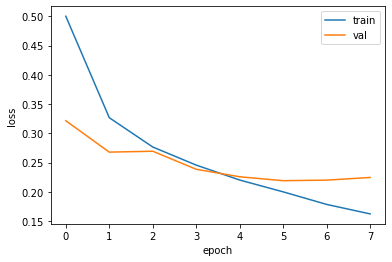

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [29]:
# epoch는 4 or 5 정도가 최적
# 성능평가
model.evaluate(x_target_scaled, y_target_scaled)

375/375 [==============================] - 2s 4ms/step - loss: 0.2190 - accuracy: 0.9187


[0.21895825862884521, 0.918749988079071]

In [30]:
#위에서 평가한 값과 에포크를 늘려가면서 학습한 값이 일치하는 실제epoc = 6 그리고 시각화는(0부터) 5에 대항

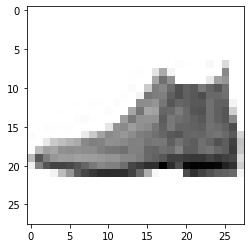

In [34]:
plt.imshow(x_target[0],cmap='gray_r')
plt.show()

In [36]:
# x_target.reshape(-1,28,28,1)
x_target_scaled.reshape(-1,28,28).shape

(12000, 28, 28)

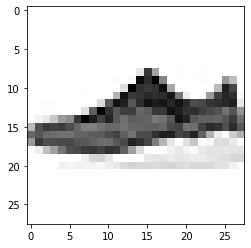

In [62]:
plt.imshow(x_target_scaled.reshape(-1,28,28)[2],cmap='gray_r')
plt.show()

In [63]:
x_target_scaled[2:3].shape

(1, 28, 28, 1)

In [64]:
model.predict(x_target_scaled[2:3])

array([[1.0178882e-11, 1.4360581e-14, 2.1419275e-12, 6.6545233e-12,
        2.5461995e-15, 3.8098892e-07, 1.5397370e-14, 9.9996293e-01,
        2.1517314e-11, 3.6661262e-05]], dtype=float32)

In [65]:
import numpy as np
predict_index = np.argmax(model.predict(x_target_scaled[2:3]))
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']
classes[predict_index]

'스니커즈'

In [66]:
# cnn : 합성신경곱 + 완전연결 신경망에서는 4차원 + 표준화를 했기때문에 검증데이터도 동일한 형태로
# 아래는 잘못된 테스트 결과
model.evaluate(x_target,y_target)

313/313 [==============================] - 2s 5ms/step - loss: 36.3084 - accuracy: 0.8779


[36.308414459228516, 0.8779000043869019]

In [70]:
x_target.shape

(10000, 28, 28)

In [73]:
model.evaluate(x_target.reshape(-1,28,28,1) / 255.0,y_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.2434 - accuracy: 0.9140


[0.24335715174674988, 0.9139999747276306]